# Introduction to Natural Language Processing

In this notebook, we'll go over some fundamental NLP concepts and use NLTK to work up to the example in the Nature Reviews article "Mining electronic health records: towards better research applications and clinical care"

## The 20 Newsgroups Corpus

**DEF.** A *corpus* is a collection of documents that we mine or retrieve information from.

The *20 newsgroups* dataset comprises around 18000 newsgroups posts (an online forum) on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.
We will focus on the train set for now.

In [33]:
import sys
print sys.version   # check python version; I am using 2.7

2.7.12 |Anaconda custom (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [34]:
# Get the 20 newsgroups Corpus (just the train set for now)
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='train',
                          categories=('rec.autos',
                             'rec.motorcycles',
                             'rec.sport.baseball',
                             'rec.sport.hockey'),
                          remove=('headers', 'footers', 'quotes'))

In [35]:
# dir returns a list of the attributes and methods of any object
dir(news) 

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

In [36]:
news.description

'the 20 newsgroups by date dataset'

In [37]:
news.target_names

['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

In [38]:
news.data[50]

u"Stolen from Pasadena between 4:30 and 6:30 pm on 4/15.\n\nBlue and white Honda CBR900RR california plate KG CBR.   Serial number\nJH2SC281XPM100187, engine number 2101240.\n\nNo turn signals or mirrors, lights taped over for track riders session\nat Willow Springs tomorrow.  Guess I'll miss it.  :-(((\n\nHelp me find my baby!!!"

In [39]:
type(news.data[50])

unicode

**Remark**. Python stores strings in Unicode, which is a multilingual approach to encoding character data.

In [40]:
print news.data[50]

Stolen from Pasadena between 4:30 and 6:30 pm on 4/15.

Blue and white Honda CBR900RR california plate KG CBR.   Serial number
JH2SC281XPM100187, engine number 2101240.

No turn signals or mirrors, lights taped over for track riders session
at Willow Springs tomorrow.  Guess I'll miss it.  :-(((

Help me find my baby!!!


In [41]:
# Exactly how many documents are there?
len(news.data)

2389

## Transforming Raw Text into Features

**Main Idea**. Transform raw text into *linguistic units*. 
For example, a sentence is "a grammatical unit of one or more words that expresses an independent statement, question, request, command, exclamation, etc., and that typically has a subject as well as a predicate, as in 'Bob is here'. or 
'Is Bob here?'"

We want to find the content within a text by (1) identifying the sentences, (2) getting the content from each sentence, (3) ultimately aggregate the content from each sentence to achieve full understanding of the whole text.

**Steps**.

    a. Boundary Detection
    b. Tokenization
    c. Normalization, Stemming, Lemmatization
     
    d. Part-of-speech tagging
    e. Shallow Parsing
    f. Entity Recognition

See NLTK book, Chapter 7.

In [42]:
import nltk

# Let's play around with the first document for a while
doc = news.data[50]

# Starting with boundary detection,
sents = nltk.sent_tokenize(doc)

for i, s in enumerate(sents):
    print 30*"-", "sentence %d" % i, 30*"-"
    print s

------------------------------ sentence 0 ------------------------------
Stolen from Pasadena between 4:30 and 6:30 pm on 4/15.
------------------------------ sentence 1 ------------------------------
Blue and white Honda CBR900RR california plate KG CBR.
------------------------------ sentence 2 ------------------------------
Serial number
JH2SC281XPM100187, engine number 2101240.
------------------------------ sentence 3 ------------------------------
No turn signals or mirrors, lights taped over for track riders session
at Willow Springs tomorrow.
------------------------------ sentence 4 ------------------------------
Guess I'll miss it.
------------------------------ sentence 5 ------------------------------
:-(((

Help me find my baby!!
------------------------------ sentence 6 ------------------------------
!


### Sentence and Word Segmentation, Tokenization

**DEF.** A *token* is the technical name for a sequence of characters, e.g. "sugery", "hip", "ward", that we want to treat as a group. 

In [43]:
sent = sents[3]
sent

u'No turn signals or mirrors, lights taped over for track riders session\nat Willow Springs tomorrow.'

In [44]:
# Segment the words in sentence with a "tokenizer"
tokens = nltk.word_tokenize(sent)
tokens

[u'No',
 u'turn',
 u'signals',
 u'or',
 u'mirrors',
 u',',
 u'lights',
 u'taped',
 u'over',
 u'for',
 u'track',
 u'riders',
 u'session',
 u'at',
 u'Willow',
 u'Springs',
 u'tomorrow',
 u'.']

### Normalization and Stemming

**DEF.** In many applications, one *normalizes* text to lowercase.

**DEF.** The *vocabulary* of a text is the set of (normalized) tokens that it uses.

In [45]:
# Normalize the tokens
normalized_tokens = [t.lower() for t in tokens]
print '\nNormalized tokens:\n', normalized_tokens

# Build the vocabulary
vocabulary = sorted(set(normalized_tokens))
print '\nThe vocabulary:\n', vocabulary


Normalized tokens:
[u'no', u'turn', u'signals', u'or', u'mirrors', u',', u'lights', u'taped', u'over', u'for', u'track', u'riders', u'session', u'at', u'willow', u'springs', u'tomorrow', u'.']

The vocabulary:
[u',', u'.', u'at', u'for', u'lights', u'mirrors', u'no', u'or', u'over', u'riders', u'session', u'signals', u'springs', u'taped', u'tomorrow', u'track', u'turn', u'willow']


**DEF.** A next possible step is to *stem* the text by stripping off any affixes.

**DEF.** A *lexicon* is a collection of words and/or phrases along with 
associated information, such as part-of-speech and sense definitions.
A lexical entry consists of a *lemma* along with additional information.
The step of mapping tokens, normalized tokens, or stemmed tokens
to lemmas is called *lemmatization*.

In [46]:
print [nltk.PorterStemmer().stem(t) for t in tokens]

[u'No', u'turn', u'signal', u'or', u'mirror', u',', u'light', u'tape', u'over', u'for', u'track', u'rider', u'session', u'at', u'Willow', u'Spring', u'tomorrow', u'.']


In [47]:
# A stemming test
example_tokens = ['lie', 'lied', 'lay', 'lies', 'lying']
stemmed_tokens = [nltk.PorterStemmer().stem(t) for t in example_tokens]
stemmed_tokens

[u'lie', u'lie', u'lay', u'lie', u'lie']

### Descriptive stats with normalized tokens: word frequencies and dispersion plots

In [48]:
ltokens = [nltk.word_tokenize(doc) for doc in news.data[:500]]
# convert list of list of tokens (ltokens) into a list of tokens
import itertools
tokens_all = list(itertools.chain.from_iterable(ltokens)) 

In [49]:
# convert list of tokens to nltk text object
x = nltk.Text(t.lower() for t in tokens_all)

In [50]:
print "The text comprises %d normalized tokens." % len(x)
print "The first few are", x[:10]

The text comprises 78685 normalized tokens.
The first few are [u'my', u'friend', u'brought', u'a', u'subaru', u'svx', u'recently', u'.', u'i', u'had']


In [51]:
from nltk import FreqDist
fdist = FreqDist(x)
print 'Number of times \"car\" occurs = ', fdist['car']
print 'Number of times \"Car\" occurs = ', fdist['Car']

Number of times "car" occurs =  84
Number of times "Car" occurs =  0


In [52]:
fdist.most_common(10)

[(u'the', 3354),
 (u',', 3242),
 (u'.', 3026),
 (u'--', 2569),
 (u'a', 1388),
 (u'to', 1361),
 (u'i', 1162),
 (u'and', 1134),
 (u'of', 1011),
 (u')', 968)]

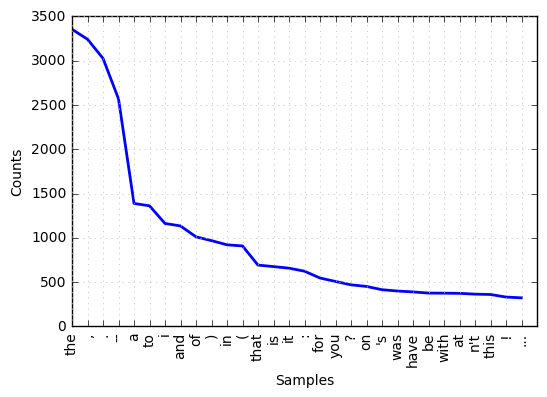

In [53]:
# Frequency plot of tokens
fdist.plot(30) 

In [54]:
# x.concordance('n\'t')
nltk.word_tokenize(u"Don't , wouldn't. Sarah's car was stolen.")

[u'Do',
 u"n't",
 u',',
 u'would',
 u"n't",
 u'.',
 u'Sarah',
 u"'s",
 u'car',
 u'was',
 u'stolen',
 u'.']

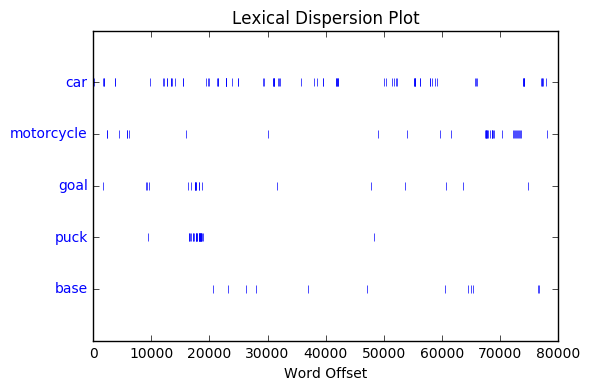

In [55]:
# We are working with car, motorcycle, hockey, and baseball 
x.dispersion_plot(['car','motorcycle','goal','puck','base'])

In [56]:
# define function that extracts tokens from a given newsgroups category
def words_in_category(cat):
    g = fetch_20newsgroups(subset='train',
                           categories=[cat],
                           remove=('headers', 'footers', 'quotes'))
    ltokens = [nltk.word_tokenize(doc) for doc in g.data[:500]]
    # convert list of list of tokens (ltokens) into a list of tokens
    import itertools
    tokens = list(itertools.chain.from_iterable(ltokens)) 
    return nltk.Text(t.lower() for t in tokens)

                          car motorcycle       goal       puck       base 
         rec.autos        397          0          1          0          5 
   rec.motorcycles         47         90          0          0          4 
rec.sport.baseball          0          0          1          2         36 
  rec.sport.hockey          5          0        109        104          3 


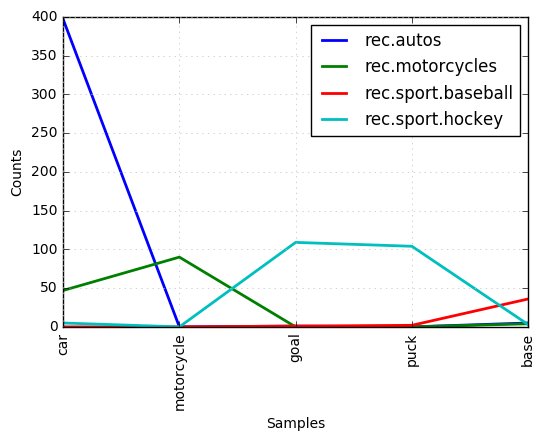

In [57]:
cfd = nltk.ConditionalFreqDist((cat, word)
                                for cat in ['rec.autos',
                                            'rec.motorcycles',
                                            'rec.sport.baseball',
                                            'rec.sport.hockey']
                                for word in words_in_category(cat))

cfd.tabulate(samples=['car','motorcycle','goal','puck','base'])
cfd.plot(samples=['car','motorcycle','goal','puck','base'])

### Word Concordances

A word concordance captures the context around a word.

In [58]:
x.concordance('car',lines=5,width=80)

Displaying 5 of 84 matches:
couples times and i think its a great car , esp on snow . however when she took
retty stubid to me . by the way , the car looks great . scoring stats for the s
. kind of disconcerting . i sold that car quite a few years back but the memory
mon law had been in place then , that car would have been covered . i have had 
would never purchase another american car with a standard . american manufactur


### POS Tagging

Tagging each token with its part of speech is useful for other tasks in natural language processing, such as named entity recognition and relation extraction.

In [59]:
# tokens = nltk.word_tokenize(sent)
tokens = nltk.word_tokenize(u"Dr. J. Gubler studied dengue at the CDC.")
tokens

[u'Dr.', u'J.', u'Gubler', u'studied', u'dengue', u'at', u'the', u'CDC', u'.']

In [60]:
post_tokens = nltk.pos_tag(tokens)
for item in post_tokens:
    print item

(u'Dr.', 'NNP')
(u'J.', 'NNP')
(u'Gubler', 'NNP')
(u'studied', 'VBD')
(u'dengue', 'NN')
(u'at', 'IN')
(u'the', 'DT')
(u'CDC', 'NNP')
(u'.', '.')


In [61]:
# What do the tags mean?
print nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
None


### Shallow parsing and Named Entity Recognition (NER)

In [62]:
chunked_sentence = nltk.ne_chunk(post_tokens)
print chunked_sentence

(S
  Dr./NNP
  J./NNP
  (PERSON Gubler/NNP)
  studied/VBD
  dengue/NN
  at/IN
  the/DT
  (ORGANIZATION CDC/NNP)
  ./.)


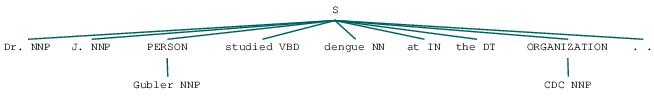

In [68]:
import os
from IPython.core.display import display
os.environ['PATH'] += os.pathsep + 'C://toolkits//gs//gs9.20//bin'
chunked_sentence

Can we get a better parsing of the above sentence?

**Chunking** is a technique that segments and labels multi-token sequences.

A *chunk grammar* is the set of rules that define how sentences should be chunked. 

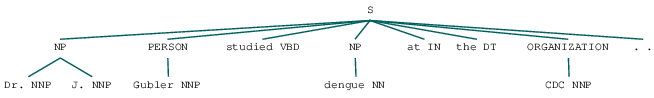

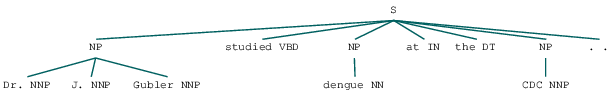

In [69]:
# define the chunk grammar and initialize the chunker
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)

# parse the sentence using the chunker
display(cp.parse(chunked_sentence))
display(cp.parse(post_tokens))

Note on regular expressions:
 * | : "or" symbol
 * ? : zero or one occurrences of the preceding element. For example, colou?r matches both "color" and "colour".
 * \* : zero or more occurrences of the preceding element
 * \+ : one or more occurrences of the preceding element

Some regular expression examples:

In [203]:
import re
some_text = '\n'.join(news.data[:1000])
m = re.search(r'(.*) \:\)', some_text)
m.group()

u'definitely win the division unless it snows in Hell/Maryland :)'

In [207]:
emojis = re.findall(r'\:\-?[\(\)]', some_text)
print emojis[:10]

[u':-)', u':)', u':-)', u':-)', u':-)', u':-(', u':-)', u':)', u':)', u':)']


### Appendix

In [208]:
# get some of the named entities in 20 news groups
import helper_ner 

sentences = []
[sentences.extend(nltk.sent_tokenize(text)) for text in news.data[:1]]
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=False)

named_entities = helper_ner.get_all_named_entities(chunked_sentences, structure='string')
unique_named_entities = set(named_entities)
for l in unique_named_entities:
    print l

(GPE Toronto/NNP)
(ORGANIZATION SVX/NNP)
(ORGANIZATION Subaru/NNP)
(GPE Subaru/NNP)
